# Project on "powerproduction" dataset
### Loading the file
First import python packages. Next read in the csv which is saved in the same sub directory as the Jupyter Notebok file allowing the file path to be straight forward. Create the dfpower dataframe from the csv. 

In [1]:
# Import packages required for computation and visualisation. Also matplotlib magic command
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dfpower = pd.read_csv('powerproduction.csv')

#### Checking the data
Check the file loaded ok using df.head( ) to view the first 5 (default) rows and df.tail( ) to view the last 5 rows. The amount of rows shown can be shown by inserting a number inside the brackets.

In [2]:
dfpower.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [3]:
dfpower.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Check for non zero 'power' values
The head and tail functions both returned 0.0 "power" values. We can use the command df.iloc[ ] to view row index values in the middle of the dataset to ensure power has some non zero values. 

In [4]:
dfpower.iloc[200:205]

,speed,power
200,10.185,22.305
201,10.210,20.704
202,10.235,30.341
203,10.260,24.293
204,10.285,20.636


#### Summary of the dataset
df.describe( ) is a very handy function to display important summary statistics about the dataset.

In [5]:
dfpower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Data Visualisation
Data visualisation is very useful to understand the data. 

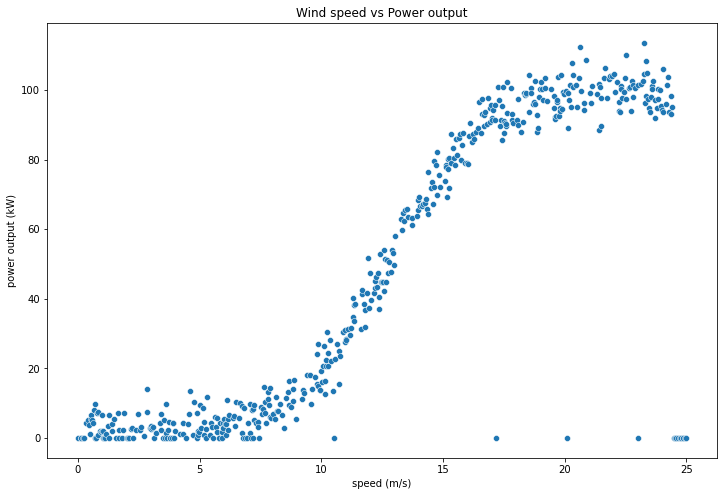

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dfpower, x='speed', y='power')
plt.xlabel('speed (m/s)')
plt.ylabel('power output (kW)')
plt.title("Wind speed vs Power output")
plt.show();

### Use Numpy to fit a simple regression

In [34]:
# Use the numpy flatten function to convert dateframe to numpy to perform np.polyfit
speed_flatten = dfpower['speed'].values.flatten()
power_flatten = dfpower['power'].values.flatten()
print(type(speed_flatten))
print(type(power_flatten))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [40]:
# use numpy.polyfit to get the coefficients of the line of best fit
m = np.polyfit(speed_flatten, power_flatten, 1)[0]
c = np.polyfit(speed_flatten, power_flatten, 1)[1]
print(f'm(slope) = {m:.3f}    c = {c:.3f}')

m(slope) = 4.918    c = -13.900


#### Best fit line
Plot the best fit line on top of the original data

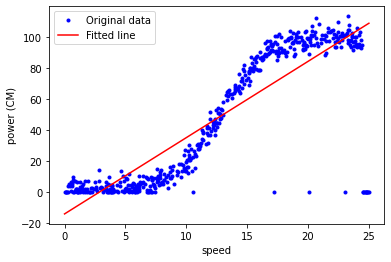

In [43]:
# Plot the best fit line.
plt.plot(speed_flatten, power_flatten, '.b', label='Original data')
plt.plot(speed_flatten, m * speed_flatten + c, 'r-', label='Fitted line')

# Add axis labels and a legend.
plt.xlabel('speed')
plt.ylabel('power (CM)')
plt.legend()

# Show the plot.
plt.show();

In [45]:
# use numpy.polyfit to get the coefficients of the line of best fit
# m1 = np.polyfit(speed_flatten, power_flatten, 2)[0]
# c1 = np.polyfit(speed_flatten, power_flatten, 2)[1]
# print(f'm(slope) = {m:.3f}    c = {c:.3f}')
np.polyfit(speed_flatten, power_flatten, 2)

array([ -0.07021949,   6.67418543, -21.22684391])